In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import keras

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras import layers

In [ ]:
!pip install keras-tuner

In [ ]:
import kerastuner
from tensorflow import keras
from kerastuner import RandomSearch
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/Neural Networks/forestfires.csv')
pd.set_option('display.max_columns',40)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
fire_data=df.drop(df.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]],axis=1)
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
# Info
# month:'jan'to'dec'
# day: 'mon'to'sun'
# FFMC: 18.7 to 96.20
# DMC: 1.1 tO 291.3
# DC: 7.9 to 890.6
# ISI: 0.0 to 56.10
# temp(c): 2.2 to 33.30
# RH(%): 15.0 to 100
# wind(km/hr): 0.40 to 9.40
# rain(mm/m2):0.0 to 6.4
# area(ha):0.00 to 1090.84

In [ ]:
# Data Exploration
fire_data.shape

(517, 12)

In [ ]:
fire_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [ ]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [ ]:
fire_data[fire_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [ ]:
# Numerical Variables
numerical_features=[feature for feature in fire_data.columns if fire_data[feature].dtypes !='O']
print('Number of numerical variables:',len(numerical_features))

Number of numerical variables: 9


In [ ]:
fire_data['month'].dtypes

dtype('O')

In [77]:
fire_data[numerical_features].head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(fire_data[feature].unique())<25 ]

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [79]:
categorical=[var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [81]:
for var in categorical:
  print(fire_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [84]:
for var in categorical:
  print(fire_data[var].value_counts()/float(len(fire_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [86]:
for var in categorical:
  print(var,'contains',len(fire_data[var].unique()),'labels')

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


In [88]:
fire_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [89]:
# Data Visualization

<Axes: xlabel='rain', ylabel='Density'>

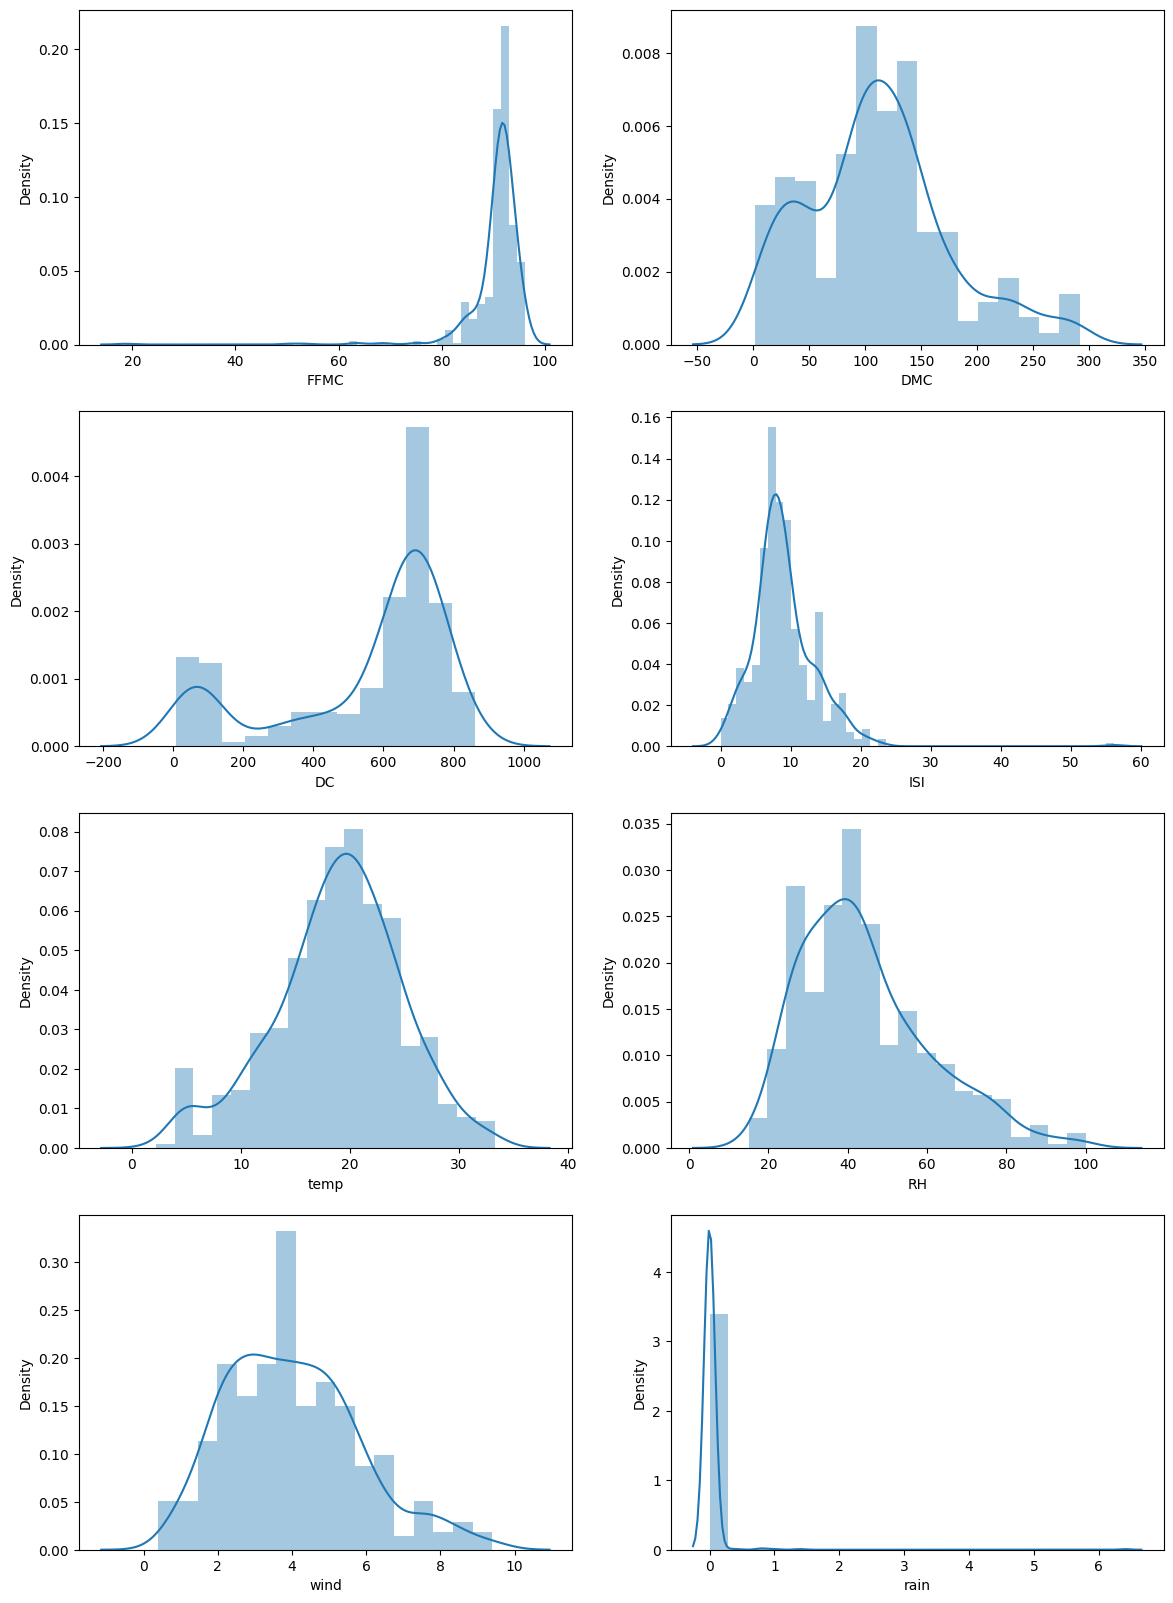

In [92]:
# Univariate plots
fig,ax=plt.subplots(4,2, figsize=(14,20))
sns.distplot(fire_data.FFMC, ax=ax[0,0])
sns.distplot(fire_data.DMC,ax=ax[0,1])
sns.distplot(fire_data.DC, ax=ax[1,0])
sns.distplot(fire_data.ISI,ax=ax[1,1])
sns.distplot(fire_data.temp,ax=ax[2,0])
sns.distplot(fire_data.RH, ax=ax[2,1])
sns.distplot(fire_data.wind, ax=ax[3,0])
sns.distplot(fire_data.rain,ax=ax[3,1])

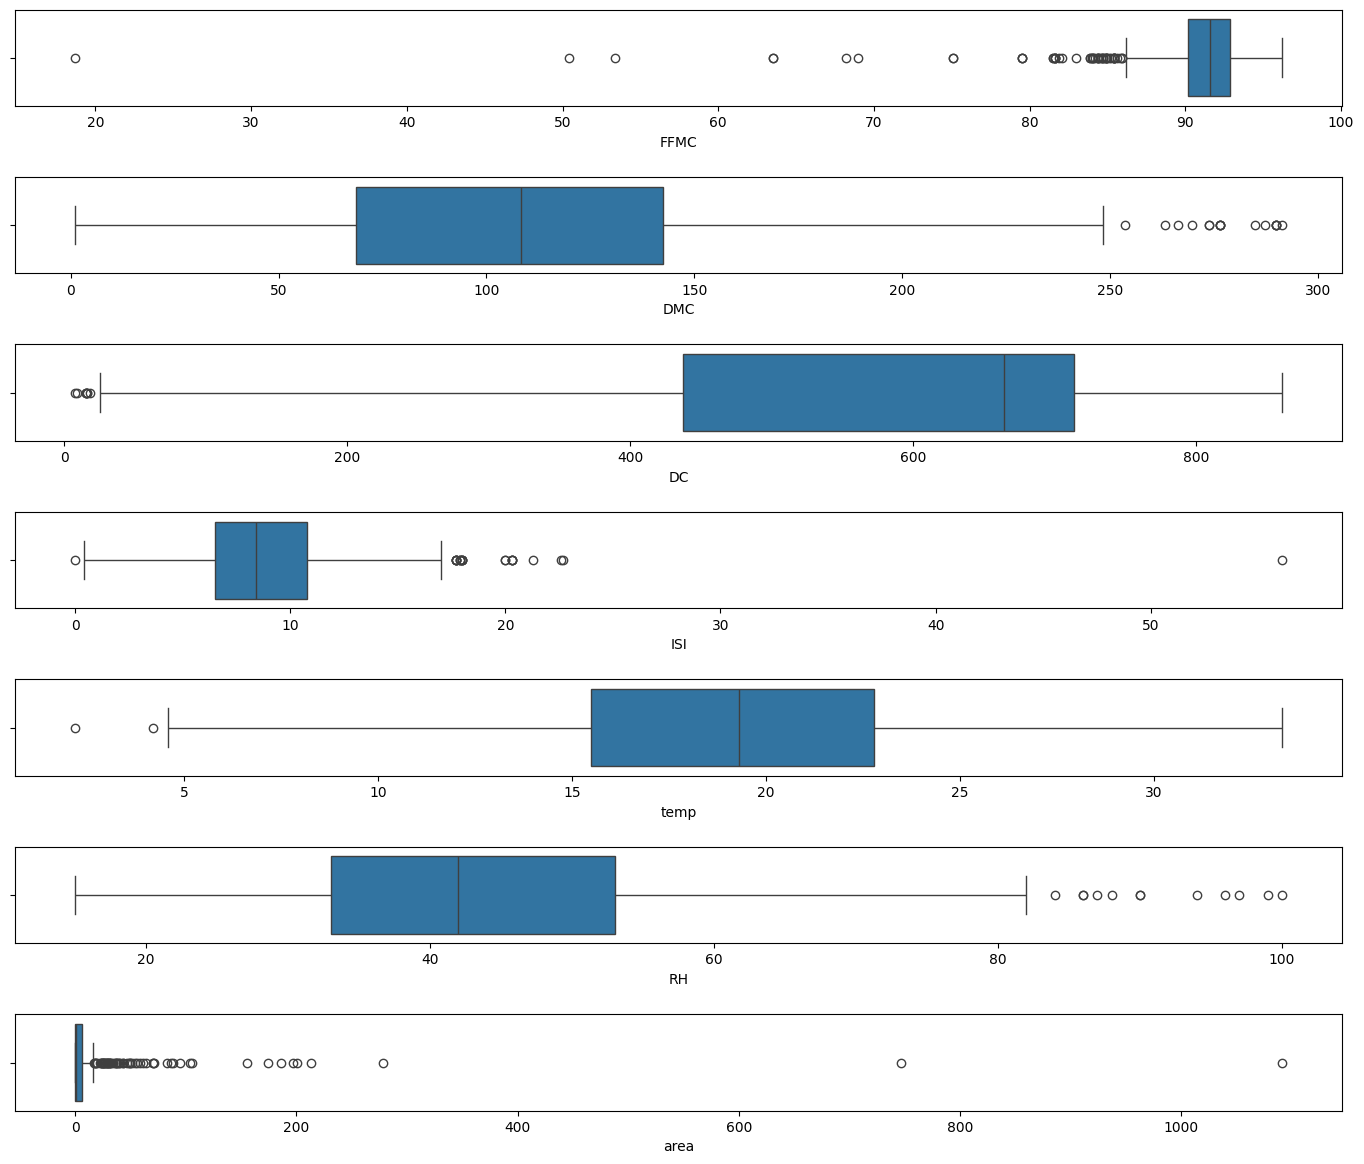

In [97]:
outlier=fire_data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,ax=axes[0])
sns.boxplot(x='DMC',data=outlier,ax=axes[1])
sns.boxplot(x='DC',data=outlier,ax=axes[2])
sns.boxplot(x='ISI',data=outlier,ax=axes[3])
sns.boxplot(x='temp',data=outlier,ax=axes[4])
sns.boxplot(x='RH',data=outlier,ax=axes[5])
sns.boxplot(x='area',data=outlier,ax=axes[6])
plt.tight_layout(pad=2.0)

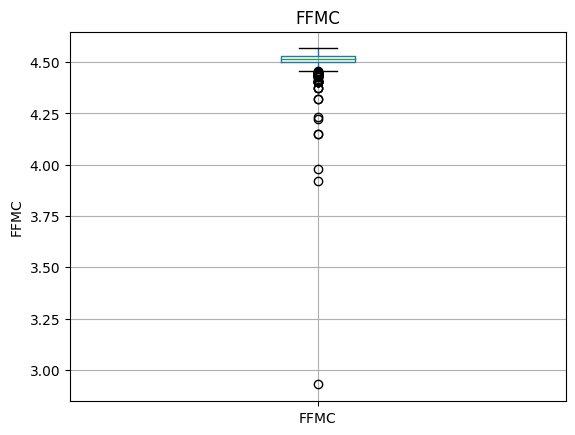

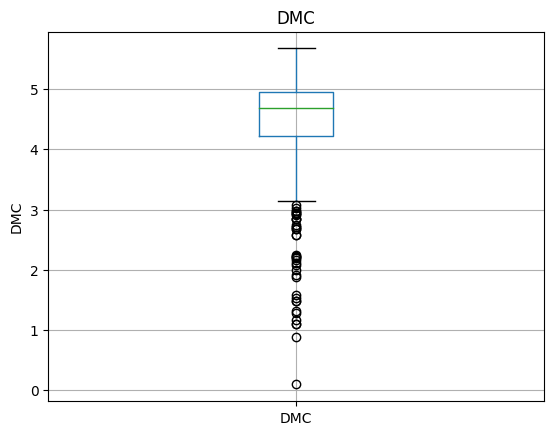

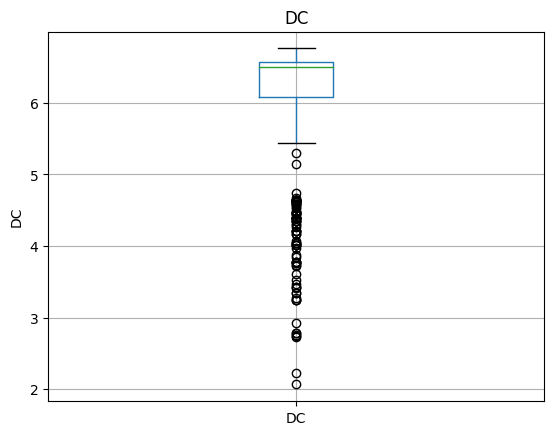

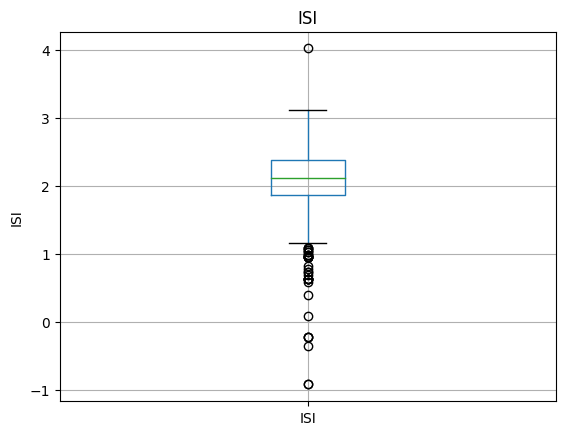

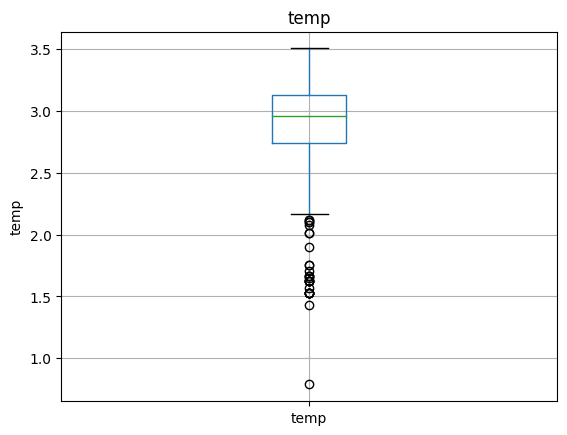

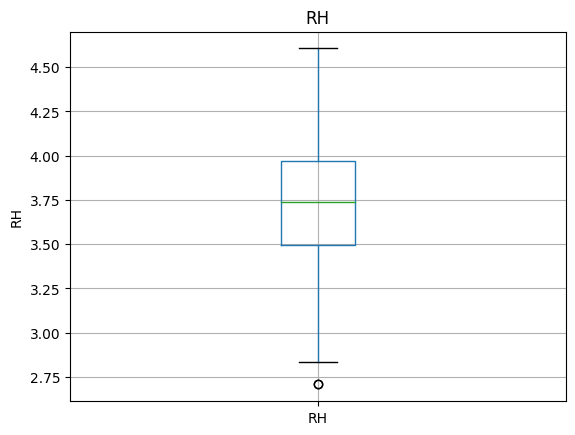

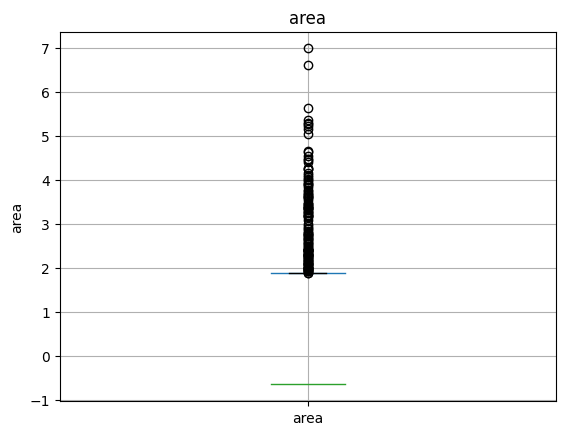

In [99]:
# After Log-Transformation
for feature in continuous_feature:
  data=fire_data.copy()
  data[feature]=np.log(data[feature])
  data.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

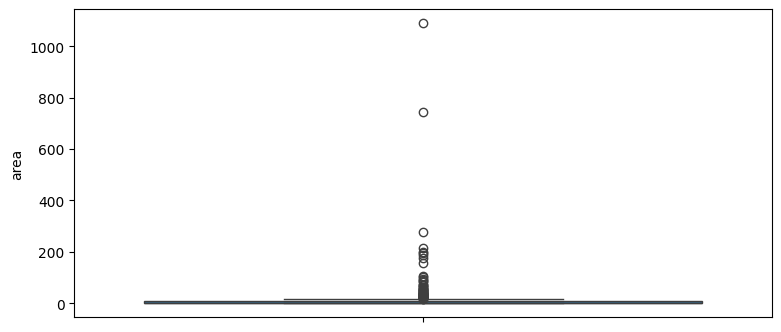

In [102]:
plt.figure(figsize=(9,4))
sns.boxplot(fire_data['area']);

In [104]:
# Categorical Variables
categorical_features=[feature for feature in fire_data.columns if fire_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features),'\n',categorical_features)
df[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [107]:
for feature in fire_data.columns:
  if fire_data[feature].dtypes=='object':
    unique_cat=len(fire_data[feature].unique())
    print("Feature'{col_name}' has {unique_cat} unique categories".format(col_name=feature,unique_cat=unique_cat))
  print(fire_data[feature].value_counts())
  print()

Feature'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

17.4    8
1

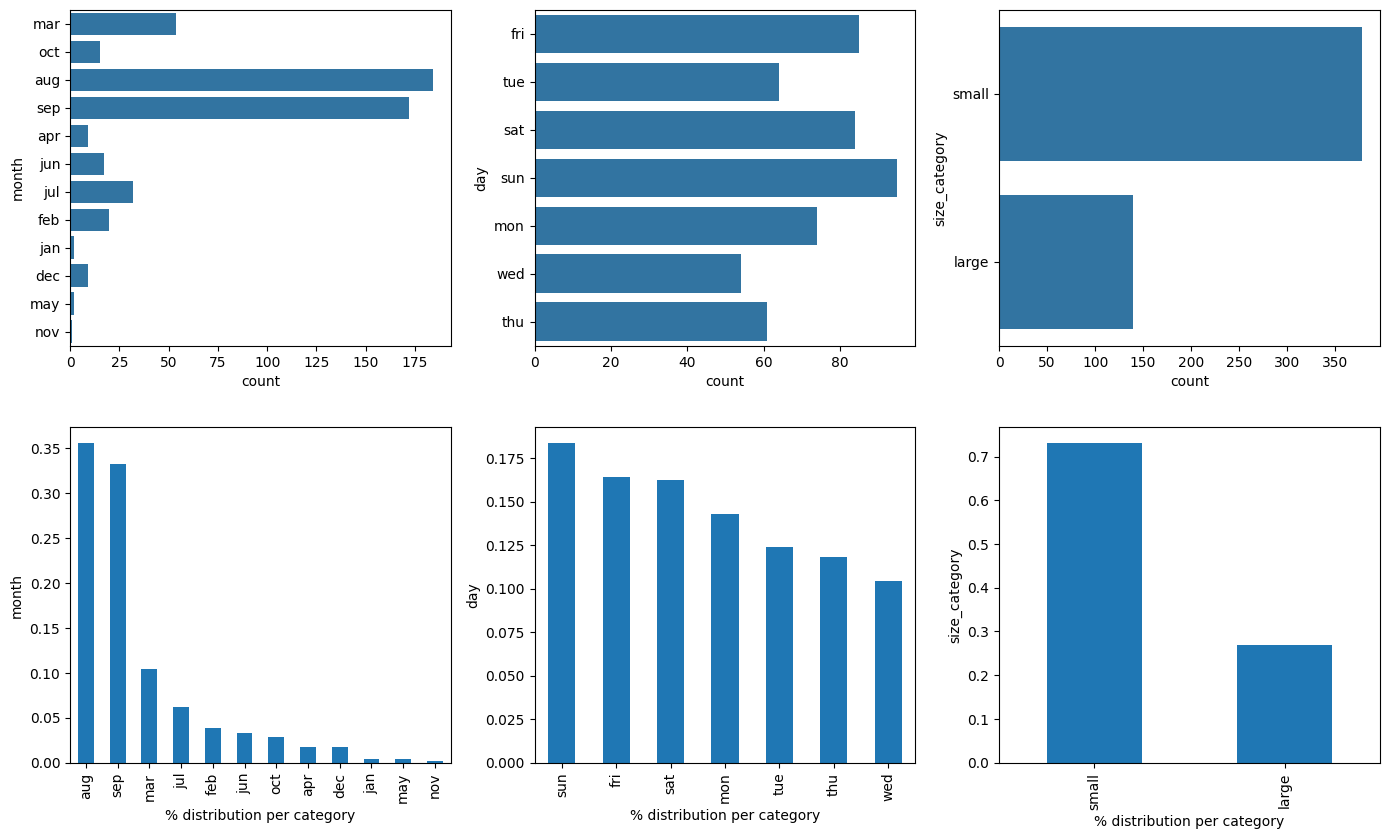

In [108]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
  plt.subplot(3,3,i)
  sns.countplot(data=fire_data,y=col)
  plt.subplot(3,3,i+3)
  fire_data[col].value_counts(normalize=True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')

plt.tight_layout()
plt.show()

In [ ]:
# Bivariate Analysis

In [112]:
import pandas as pd

In [116]:
# Relationship of Categorical Features WRT to Target Feature
print(fire_data['area'].describe(),'\n')

df2=fire_data.copy()
def area_cat(area):
  if area== 0.0:
      return "No damage"
  elif area<=1:
      return "low"
  elif area<=25:
      return "moderate"
  elif area<=100:
      return "high"
  else:
      return "very high"

df2['damage_category']=df2['area'].apply(area_cat)
df2


count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,No damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,moderate
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,high
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,moderate
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,No damage


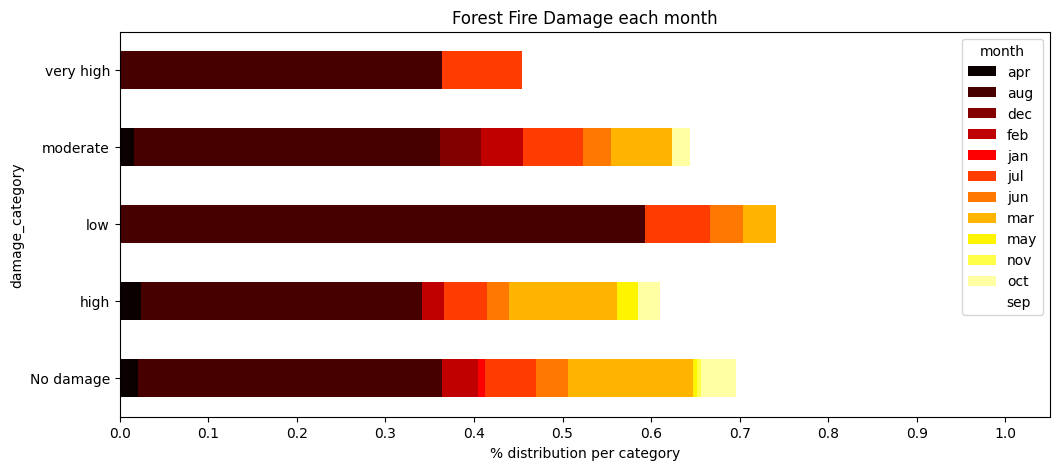

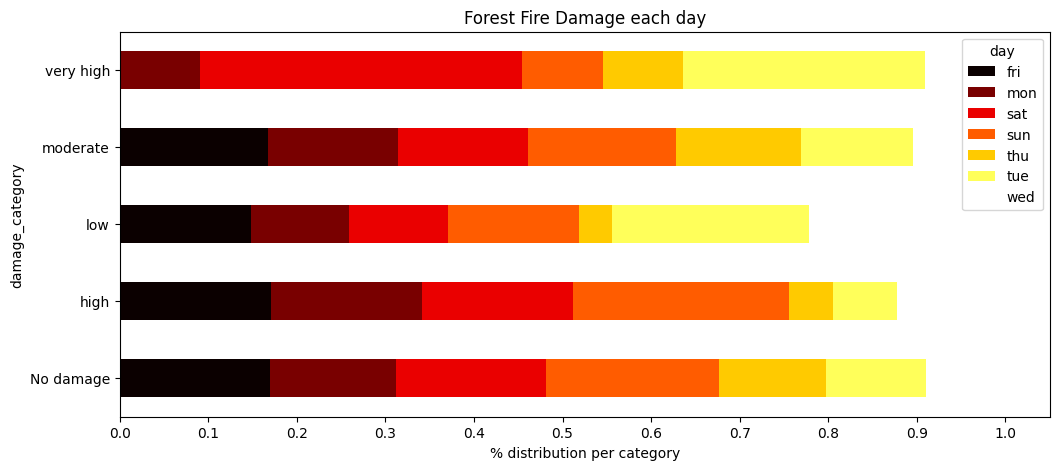

In [118]:
for col in categorical_features:
  if col!="size_category":
    cross=pd.crosstab(index=df2['damage_category'],columns=df2[col],normalize='index')
    cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forest Fire Damage each {}".format(col), fontsize=12)

plt.show()

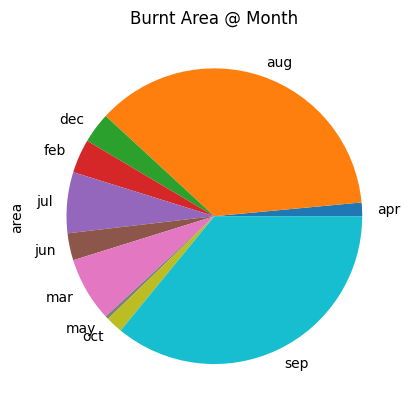

In [120]:
areaburnt= fire_data[fire_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Burnt Area @ Month')
plt.show()

In [122]:
fire_data.size_category.unique()

array(['small', 'large'], dtype=object)

Text(0.5, 1.0, 'Forest Fire Size Category')

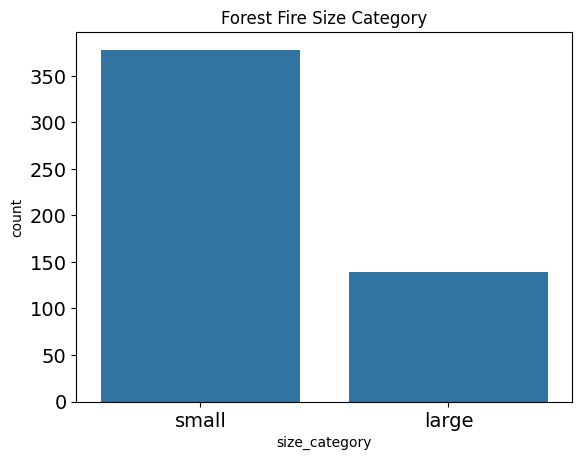

In [125]:
pa1=sns
sns.countplot(x='size_category',data= fire_data,order=fire_data['size_category'].value_counts().index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Forest Fire Size Category')

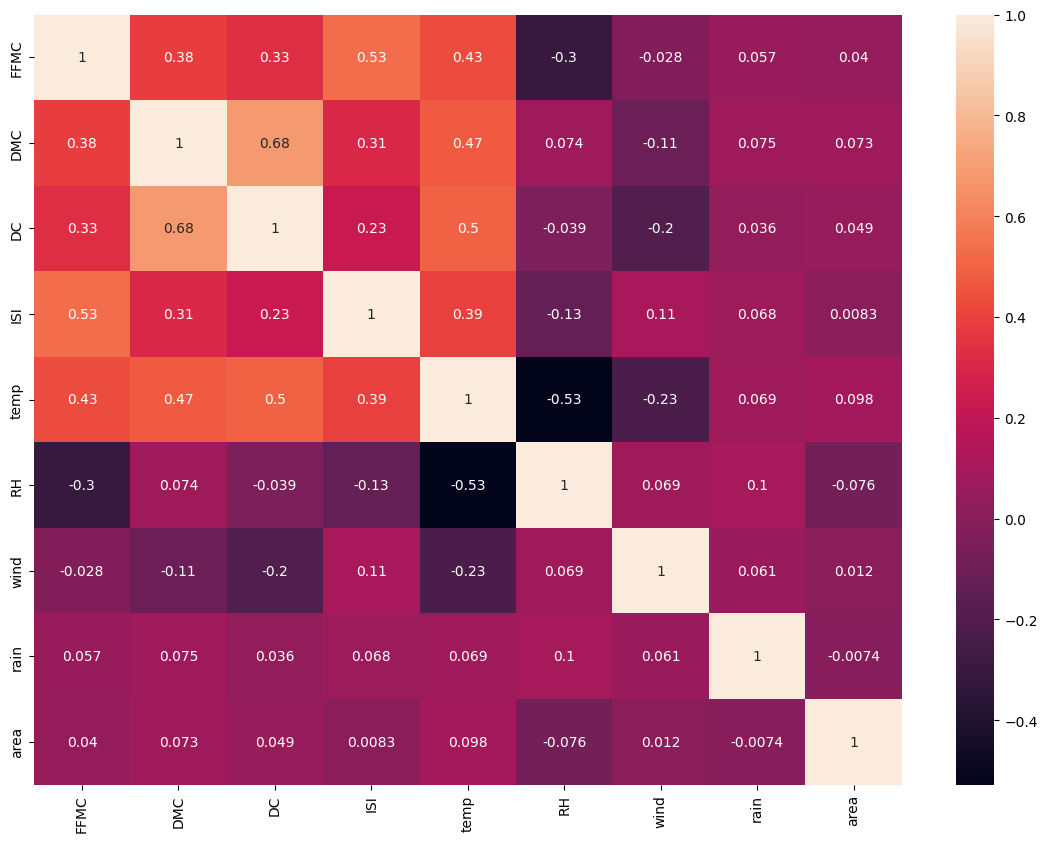

In [127]:
fig=plt.figure(figsize=(14,10))
sns.heatmap(fire_data.corr(), annot=True);
plt.xticks(rotation=90);

In [128]:
# Data Pre-Processing


In [130]:
# Feature Engineering
continous_feature=[feature for feature in fire_data.columns if fire_data[feature].dtype!='O']
fire_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,area
0,86.2,26.2,94.3,5.1,8.2,51,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.00
2,90.6,43.7,686.9,6.7,14.6,33,0.00
3,91.7,33.3,77.5,9.0,8.3,97,0.00
4,89.3,51.3,102.2,9.6,11.4,99,0.00
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,6.44
513,81.6,56.7,665.6,1.9,21.9,71,54.29
514,81.6,56.7,665.6,1.9,21.2,70,11.16
515,94.4,146.0,614.7,11.3,25.6,42,0.00


In [132]:
df2_standard_scaled=fire_data.copy()
features=df2_standard_scaled[continous_feature]

In [134]:
scaler=StandardScaler()
df2_standard_scaled[continous_feature]=scaler.fit_transform(features.values)


In [136]:
df2_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [137]:
# To check if Mean=0, SD=1

In [139]:
df2_standard_scaled.mean()

FFMC   -1.752306e-15
DMC    -2.748715e-17
DC      6.871787e-17
ISI     1.030768e-17
temp    2.542561e-16
RH      2.198972e-16
wind   -4.191790e-16
rain   -6.871787e-18
area    4.123072e-17
dtype: float64

In [141]:
np.round(df2_standard_scaled.mean(),1)

FFMC   -0.0
DMC    -0.0
DC      0.0
ISI     0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area    0.0
dtype: float64

In [143]:
np.round(df2_standard_scaled.std(),1)

FFMC    1.0
DMC     1.0
DC      1.0
ISI     1.0
temp    1.0
RH      1.0
wind    1.0
rain    1.0
area    1.0
dtype: float64

In [146]:
df2=df2_standard_scaled.copy()
df2.drop('size_category',axis=1,inplace=True)
df2=pd.get_dummies(df2.iloc[:,:])
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [148]:
df2['size_category']=fire_data.size_category
df2['size_category']=np.where(df2['size_category'].str.contains("large"),1,0)
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [150]:
df2.size_category.unique()

array([0, 1])

In [155]:
print(df2.columns)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed', 'size_category'],
      dtype='object')


In [158]:
# Feature Selection Technique
data1=df.copy()
data1.drop('size_category',axis=1, inplace=True)
data1=pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [161]:
data1['size_category']=df2.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [163]:
le=LabelEncoder()
le.fit(data1["size_category"])
data1["size_category"]=le.transform(data1["size_category"])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [166]:
x=data1.drop('size_category',axis=1)
y=data1.size_category

In [168]:
# Feature Extraction
test=SelectKBest(score_func=chi2,k=4)
fit = test.fit(x,y)

In [171]:
# Scores
scores=fit.scores_
features=fit.transform(x)
score_df2=pd.DataFrame(list(zip(scores,x.columns)),columns=['Score','Feature'])
score_df2.sort_values(by='Score',ascending=False, inplace=True)
score_df2

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


In [176]:
# Hyperparameter Tuning
def build_model(hp):
  model=Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=100,step=32)))

  model.add(layers.Dense(1,activation='sigmoid'))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install kerastuner

In [184]:
!python setup.py install

python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,
                   directoty='project',project_name='Forest Fire')
tuner.search_space_summary()